**Note** : The 'Paired test for equality of means', 'Chi-Square Test for Variance', and 'F-test for Equality of Variances' sections are available as additional content. Please refer the hands-on notebook in 'Week 3: Additional Learning Material'.

Problem 2
The breaking strength of gunny bags used for packaging cement is normally distributed with a mean of 5 kg per sq. centimeter and a standard deviation of 1.5 kg per sq. centimeter. The quality team of the cement company wants to know the following about the packaging material to better understand wastage or pilferage within the supply chain


In [14]:
# import the important packages
import pandas as pd  # library used for data manipulation and analysis
import numpy as np  # library used for working with arrays
import matplotlib.pyplot as plt  # library for plots and visualizations
import seaborn as sns  # library for visualizations
from scipy.stats import norm  # library for probability distributions

#%matplotlib inline

from scipy import stats  # this library contains a large number of probability distributions as well as a growing library of statistical functions

In [5]:
# declare the parameters n and p of the binomial distribution
n = 5
p = 0.33
# store all possible number of unsatisfactory doses in a numpy array
k=np.arange(0,3.6)
k

array([0., 1., 2., 3.])

In [10]:
# calculate the probability P(X<3.17) using cdf function
prob = norm.cdf(3.17, 5, 1.5)
print('Proportion of the gunny bags have a breaking strength of less than 3.17 kg per sq cm is', round(prob, 4))

Proportion of the gunny bags have a breaking strength of less than 3.17 kg per sq cm is 0.1112


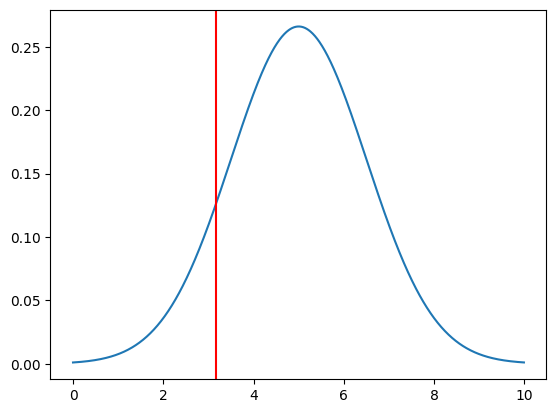

In [53]:
x_axis = np.arange(0, 10, 0.01)
plt.plot(x_axis, norm.pdf(x_axis, 5, 1.5))
plt.axvline(x=3.17, color="red")
plt.show()

In [141]:
prob = 1-norm.cdf(3.6, 5, 1.5)
print('Proportion of the gunny bags have a breaking strength of at least 3.6 kg per sq cm is', round(prob, 4))

Proportion of the gunny bags have a breaking strength of at least 3.6 kg per sq cm is 0.8247


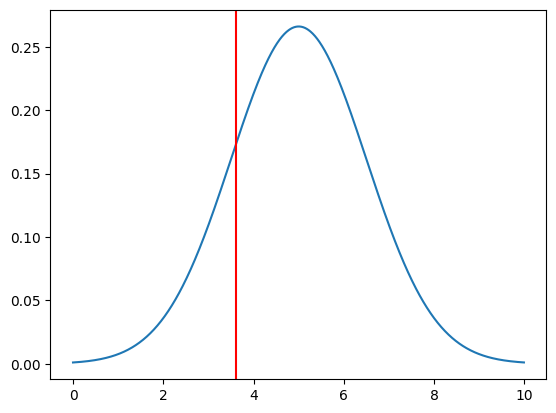

In [54]:
x_axis = np.arange(0, 10, 0.01)
plt.plot(x_axis, norm.pdf(x_axis, 5, 1.5))
plt.axvline(x=3.6, color="red")
plt.show()

Proportion of the gunny bags have a breaking strength less than 5.5 kg per sq cm

In [144]:
stats.norm.cdf(5.5, 5, 1.5)

0.6305586598182363

Proportion of the gunny bags have a breaking strength less than 5 kg per sq cm

In [48]:
1-norm.cdf(5, 5, 1.5)

0.5

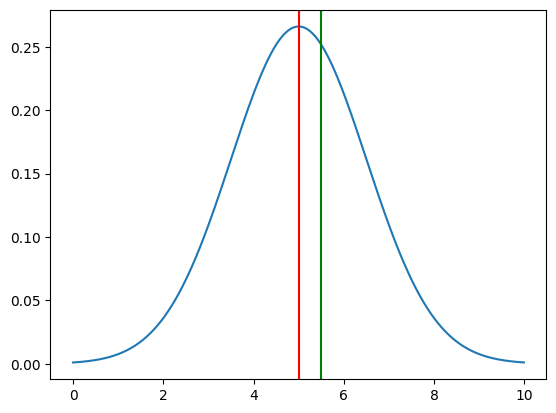

In [56]:
x_axis = np.arange(0, 10, 0.01)
plt.plot(x_axis, norm.pdf(x_axis, 5, 1.5))
plt.axvline(x=5, color="red")
plt.axvline(x=5.5, color="green")
plt.show()

In [145]:
prob = norm.cdf(3, 5, 1.5)
print('Proportion of the gunny bags have a breaking strength of less than 3 kg per sq cm is', round(prob, 4))

Proportion of the gunny bags have a breaking strength of less than 3 kg per sq cm is 0.0912


In [146]:
prob = 1-norm.cdf(7.5, 5, 1.5)
print('Proportion of the gunny bags have a breaking strength of less than 7.75 kg per sq cm is', round(prob, 4))

Proportion of the gunny bags have a breaking strength of less than 7.75 kg per sq cm is 0.0478


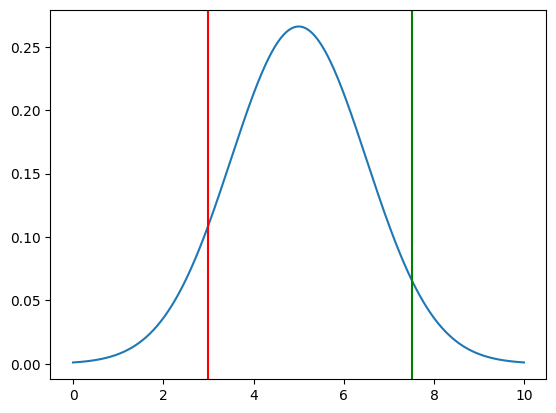

In [57]:
x_axis = np.arange(0, 10, 0.01)
plt.plot(x_axis, norm.pdf(x_axis, 5, 1.5))
plt.axvline(x=3, color="red")
plt.axvline(x=7.5, color="green")
plt.show()

Problem 3
Zingaro stone printing is a company that specializes in printing images or patterns on polished or unpolished stones. However, for the optimum level of printing of the image, the stone surface has to have a Brinell's hardness index of at least 150. Recently, Zingaro has received a batch of polished and unpolished stones from its clients. Use the data provided to answer the following (assuming a 5% significance level

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
from scipy.stats import binom
from statsmodels.formula.api import ols
from statsmodels.stats.anova import _get_covariance,anova_lm

In [62]:
Zingaro_Company = pd.read_csv('/content/Zingaro_Company.csv')
Zingaro_Company.head()

,Unpolished,Treated and Polished
0,164.481713,133.209393
1,154.307045,138.482771
2,129.861048,159.665201
3,159.096184,145.663528
4,135.256748,136.789227


In [63]:
df = Zingaro_Company.copy()

In [64]:
df.shape

(75, 2)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unpolished            75 non-null     float64
 1   Treated and Polished  75 non-null     float64
dtypes: float64(2)
memory usage: 1.3 KB


In [66]:
df.describe()

,Unpolished,Treated and Polished
count,75.000000,75.000000
mean,134.110527,147.788117
std,33.041804,15.587355
min,48.406838,107.524167
25%,115.329753,138.268300
50%,135.597121,145.721322
75%,158.215098,157.373318
max,200.161313,192.272856


In [74]:
df.value_counts()

,,count
Unpolished,Treated and Polished,
48.406838,168.346223,1
158.737940,172.121677,1
154.894535,153.818635,1
154.670182,155.146849,1
154.307045,138.482771,1
...,...,...
121.407525,107.524167,1
120.894315,141.344288,1
120.437298,138.053829,1


In [71]:
df.isna().sum()

,0
Unpolished,0
Treated and Polished,0


In [75]:
df.duplicated().sum()

0

In [5]:
print('The mean Zingaro Company score for Polished is ' + str(Zingaro_Company['Treated and Polished'].mean()))

The mean Zingaro Company score for Polished is 147.78811718133335


In [6]:
print('The standard deviation of Zingaro for Polished is ' + str(round(Zingaro_Company['Treated and Polished'].std(), 2)))

The standard deviation of Zingaro for Polished is 15.59


In [38]:
print('The mean Zingaro Company score for UnPolished is ' + str(Zingaro_Company['Unpolished '].mean()))

The mean Zingaro Company score for UnPolished is 134.11052653373332


In [39]:
print('The standard deviation of Zingaro for UnPolished  is ' + str(round(Zingaro_Company['Unpolished '].std(), 2)))

The standard deviation of Zingaro for UnPolished  is 33.04


Test Statistic and P-Value of Unpolished



In [159]:
hyp_mean = 150
t_stat, p_value = stats.ttest_ind(df['Unpolished '], hyp_mean, alternative='greater') # alternative argument is used to specify the tail of the test.

print("Test Statistic =",t_stat)
print("p-value =",p_value)

Test Statistic = -0.47771577815519234
p-value = 0.6828696918375653


Test Statistic and P-Value of Treated and Polished

In [158]:
hyp_mean = 150
t_stat, p_value = stats.ttest_ind(df['Treated and Polished'], hyp_mean, alternative='two-sided') # alternative argument is used to specify the tail of the test.

print("Test Statistic =",t_stat)
print("p-value =",p_value)

Test Statistic = -0.14096572086923168
p-value = 0.8882800551824692


P-Value of UnPolished & Treated and Polished

In [26]:
#import the required functions
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(Zingaro_Company['Unpolished '], Zingaro_Company['Treated and Polished'], equal_var = True, alternative = 'two-sided')
print('The p-value is ' + str(p_value))

The p-value is 0.0014655150194628353


Problem 4
Dental implant data: The hardness of metal implants in dental cavities depends on multiple factors, such as the method of implant, the temperature at which the metal is treated, the alloy used as well as the dentists who may favor one method above another and may work better in his/her favorite method. The response is the variable of interest.


In [88]:
from google.colab import drive

In [90]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [91]:
Dental_Hardness = pd.read_csv('/content/Dental Hardness data.csv')
Dental_Hardness.head()

,Dentist,Method,Alloy,Temp,Response
0,1,1,1,1500,813
1,1,1,1,1600,792
2,1,1,1,1700,792
3,1,1,2,1500,907
4,1,1,2,1600,792


In [92]:
dt = Dental_Hardness.copy()

In [93]:
dt.head()

,Dentist,Method,Alloy,Temp,Response
0,1,1,1,1500,813
1,1,1,1,1600,792
2,1,1,1,1700,792
3,1,1,2,1500,907
4,1,1,2,1600,792


In [94]:
dt.shape

(90, 5)

In [95]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Dentist   90 non-null     int64
 1   Method    90 non-null     int64
 2   Alloy     90 non-null     int64
 3   Temp      90 non-null     int64
 4   Response  90 non-null     int64
dtypes: int64(5)
memory usage: 3.6 KB


In [96]:
dt.isnull().sum()

,0
Dentist,0
Method,0
Alloy,0
Temp,0
Response,0


In [97]:
dt.duplicated().sum()

0

In [98]:
dt.describe()

,Dentist,Method,Alloy,Temp,Response
count,90.000000,90.000000,90.000000,90.000000,90.000000
mean,3.000000,2.000000,1.500000,1600.000000,741.777778
std,1.422136,0.821071,0.502801,82.107083,145.767845
min,1.000000,1.000000,1.000000,1500.000000,289.000000
25%,2.000000,1.000000,1.000000,1500.000000,698.000000
50%,3.000000,2.000000,1.500000,1600.000000,767.000000
75%,4.000000,3.000000,2.000000,1700.000000,824.000000
max,5.000000,3.000000,2.000000,1700.000000,1115.000000


In [99]:
Dental_Hardness['Method'].value_counts()

,count
Method,
1,30
2,30
3,30


In [128]:
# calculate the Hardness
dt['Hardness'] = dt['Response'] + dt['Temp']

In [170]:
formula = 'Hardness ~ C(Dentist)'
model = ols(formula, dt).fit()
aov_table = anova_lm(model)
print(aov_table)

              df        sum_sq       mean_sq         F    PR(>F)
C(Dentist)   4.0  1.577946e+05  39448.638889  1.763414  0.143754
Residual    85.0  1.901501e+06  22370.600000       NaN       NaN


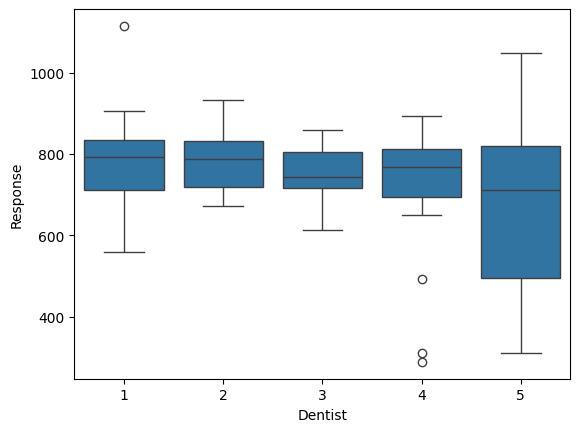

In [165]:
sns.boxplot(x="Dentist", y="Response", data=dt)
plt.show()

In [135]:
formula = 'Hardness ~ C(Method)'
model = ols(formula, dt).fit()
aov_table = anova_lm(model)
print(aov_table)

             df        sum_sq        mean_sq          F        PR(>F)
C(Method)   2.0  5.934275e+05  296713.744444  17.610109  3.787606e-07
Residual   87.0  1.465868e+06   16849.058238        NaN           NaN


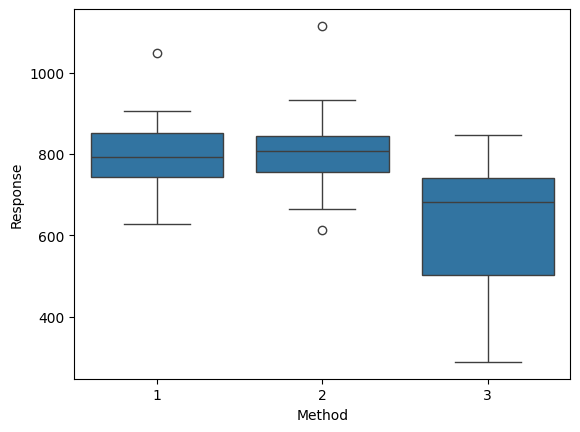

In [167]:
sns.boxplot(x="Method", y="Response", data=dt)
plt.show()

In [140]:
formula = 'Hardness ~ C(Dentist) + C(Method) + C(Dentist):C(Method) + C(Alloy) + C(Dentist):C(Alloy) + C(Method):C(Alloy) + C(Dentist):C(Method):C(Alloy)'
model = ols(formula, dt).fit()
aov_table = anova_lm(model)
print(aov_table)

                                 df         sum_sq        mean_sq          F  \
C(Dentist)                      4.0  157794.555556   39448.638889   3.120588   
C(Method)                       2.0  593427.488889  296713.744444  23.471568   
C(Alloy)                        1.0  105815.511111  105815.511111   8.370546   
C(Dentist):C(Method)            8.0  306471.844444   38308.980556   3.030435   
C(Dentist):C(Alloy)             4.0    5687.044444    1421.761111   0.112469   
C(Method):C(Alloy)              2.0   54685.088889   27342.544444   2.162935   
C(Dentist):C(Method):C(Alloy)   8.0   76929.355556    9616.169444   0.760688   
Residual                       60.0  758484.666667   12641.411111        NaN   

                                     PR(>F)  
C(Dentist)                     2.126173e-02  
C(Method)                      2.950869e-08  
C(Alloy)                       5.307581e-03  
C(Dentist):C(Method)           6.302043e-03  
C(Dentist):C(Alloy)            9.776769e-01  
C(M

In [138]:
formula = 'Hardness ~ C(Dentist) + C(Method) + C(Dentist):C(Method)'
model = ols(formula, dt).fit()
aov_table = anova_lm(model)
print(aov_table)

                        df        sum_sq        mean_sq          F  \
C(Dentist)             4.0  1.577946e+05   39448.638889   2.953917   
C(Method)              2.0  5.934275e+05  296713.744444  22.217945   
C(Dentist):C(Method)   8.0  3.064718e+05   38308.980556   2.868579   
Residual              75.0  1.001602e+06   13354.688889        NaN   

                            PR(>F)  
C(Dentist)            2.529105e-02  
C(Method)             2.643872e-08  
C(Dentist):C(Method)  7.709152e-03  
Residual                       NaN  


In [97]:
dt.head()

,Dentist,Method,Alloy,Temp,Response,Hardness
0,1,1,1,1500,813,687
1,1,1,1,1600,792,808
2,1,1,1,1700,792,908
3,1,1,2,1500,907,593
4,1,1,2,1600,792,808


from matplotlib import pyplot as plt
_df_0['Alloy'].plot(kind='hist', bins=20, title='Alloy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Temp'].plot(kind='hist', bins=20, title='Temp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Response'].plot(kind='hist', bins=20, title='Response')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Hardness'].plot(kind='hist', bins=20, title='Hardness')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Alloy', y='Temp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Temp', y='Response', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Response', y='Hardness', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Dentist']
  ys = series['Temp']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('Dentist', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Dentist')
_ = plt.ylabel('Temp')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Dentist']
  ys = series['Response']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Dentist', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Dentist')
_ = plt.ylabel('Response')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Dentist']
  ys = series['Hardness']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Dentist', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Dentist')
_ = plt.ylabel('Hardness')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Dentist']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Dentist'}, axis=1)
              .sort_values('Dentist', ascending=True))
  xs = counted['Dentist']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Dentist', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Dentist')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_11['Alloy'].plot(kind='line', figsize=(8, 4), title='Alloy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['Temp'].plot(kind='line', figsize=(8, 4), title='Temp')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Response'].plot(kind='line', figsize=(8, 4), title='Response')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Hardness'].plot(kind='line', figsize=(8, 4), title='Hardness')
plt.gca().spines[['top', 'right']].set_visible(False)